## Datasets & Dataloaders
Code for processing data samples can get messy and hard to maintain. We ideally want our dataset code to be decoupled from our model training code for better readbility and modularity.
PyTorch provide two data primitives: `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` that allow you to use pre-loaded datasets as well as your own data.
`Dataset` stores the samples and their corresponding labels, and `DataLoader` wraps an iterable around the `Dataset` to enable easy access to the samples.

PyTorch domine libraries provide a number of pre-loaded datasets that subclass `torch.utils.data.Dataset` and implement functions specific to the particular data. They can be used to prototype and benchmark our model.
* image datasets: `torchvision.datasets.ImageFolder`, `torchvision.datasets.MNIST`, `torchvision.datasets.CIFAR`, `torchvision.datasets.CocoCaptions`, `torchvision.datasets.CocoDetection`, `torchvision.datasets.FakeData`, `torchvision.datasets.FashionMNIST`, `torchvision.datasets.KMNIST`, `torchvision.datasets.QMNIST`, `torchvision.datasets.SBU`, `torchvision.datasets.SVHN`, `torchvision.datasets.VOCSegmentation`

* text datasets: `torchtext.datasets.TextClassificationDataset`, `torchtext.datasets.TextClassificationDataset`, `torchtext.datasets.LanguageModelingDataset`, `torchtext.datasets.SequenceTaggingDataset`, `torchtext.datasets.TranslationDataset`, `torchtext.datasets.SequenceTaggingDataset`, `torchtext.datasets.TranslationDataset`

* audio datasets: `torchaudio.datasets.LIBRISPEECH`, `torchaudio.datasets.YESNO`, `torchaudio.datasets.SPEECHCOMMANDS`



#### Loading a Dataset
Here is an example of how to load the Fashion-MNIST dataset from TorchVision. Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

We load the FashionMNIST Dataset with the following parameters:
* `root` is the path where the train/test data is stored,
* `train` specifies training or test dataset,
* `download=True` downloads the data from the internet if it's not available at `root`.
* `transform` and `target_transform` specify the feature and label transformations

In [3]:
import torch
from torch.utils.data import Dataset, DataLoader

from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


100%|██████████| 26421880/26421880 [00:18<00:00, 1460449.58it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 88306.71it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:03<00:00, 1448484.64it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7846030.88it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



#### iterating and visualizing the Dataset
We can index `Datasets` manually like a list: `train_data[index]`

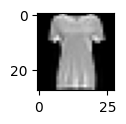

In [12]:
train_data[-1]

figure = plt.figure(figsize=(1, 1))

img, label = train_data[10]
plt.imshow(img.squeeze(), cmap="gray")
plt.show()